In [1]:
import numpy as np
from scipy import stats, linalg
import matplotlib.pyplot as plt
from pyitlib import discrete_random_variable as drv
import random

In [110]:
random.seed( 30 )
mu1 = 2
sigma1 = 2
x = np.arange(100)
p1 =  np.random.normal(mu1,sigma1,100)
p2 = np.square(p1) + 3
p3 = np.power(p1,3) + 2
bins = np.linspace(-10, 10, 100)


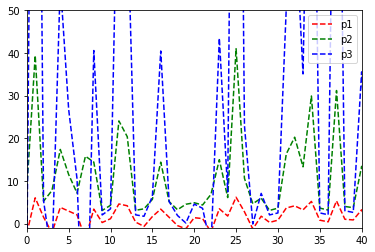

In [111]:
plt.figure
# 
plt.plot(x, p1, 'r--',x, p2, 'g--',x, p3, 'b--')
plt.xlim(0, 40)
plt.ylim(-1, 50)
plt.legend(['p1', 'p2', 'p3'])

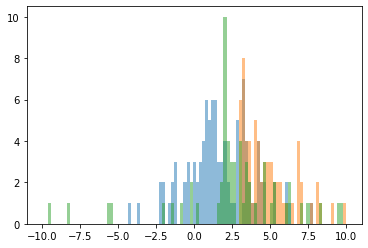

In [112]:
a = plt.hist(p1, bins, alpha=0.5, label='mu = 0')
b = plt.hist(p2, bins, alpha=0.5, label='mu = 2')
b = plt.hist(p3, bins, alpha=0.5, label='mu = 2')

In [113]:
np.size(p2),np.size(p3)

(100, 100)

In [114]:
np.corrcoef(p1,p2)

array([[1.        , 0.72290427],
       [0.72290427, 1.        ]])

In [115]:
np.corrcoef(p2,p3)

array([[1.        , 0.91533677],
       [0.91533677, 1.        ]])

In [116]:
np.corrcoef(p1,p3)

array([[1.        , 0.76928068],
       [0.76928068, 1.        ]])

In [117]:
def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
    
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr

In [118]:
def partial_modified_corr(p1,p2,p3):
    p1k = np.expand_dims(p1, axis=1)
    p2k = np.expand_dims(p2, axis=1)
    p3k = np.expand_dims(p3, axis=1)
    
    beta_p2k = linalg.lstsq(p1k, p2k)[0]  
    beta_p3k = linalg.lstsq(p1k, p3k)[0]

    res_p2k = p2k - p1k.dot(beta_p2k)
    res_p3k = p3k - p1k.dot(beta_p3k)

    corr = stats.pearsonr(np.squeeze(res_p2k), np.squeeze(res_p3k))[0]

        
    return corr

In [119]:
C = np.concatenate((p1k, p2k ,p3k),axis=1)
partial_corr(C)

array([[1.        , 0.30505313, 0.16502817],
       [0.30505313, 1.        , 0.77707385],
       [0.16502817, 0.77707385, 1.        ]])

In [120]:
partial_modified_corr(p1,p2,p3)

0.7327481408542633

We can see that the partial Correlation is 0.83 between p2 and p3 conditioned on p1 Instead of 0.97 we had.
We can regard this to the effect that both random variables are extracted directly from p1 but when using regular correlation we disregard the effect that both of them are extracted from it.

In [21]:
drv.information_mutual_conditional

<function pyitlib.discrete_random_variable.information_mutual_conditional(X, Y, Z, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, Alphabet_Z=None, keep_dims=False)>

In [22]:
# t1 = np.array((1,2,1))
# t2 = np.array((1,2,2))
# t3 = np.array((2,2,2.5))
t1 = np.round(p1) 
t2 = np.round(p2) 
t3 = np.round(p3) 

In [44]:
t1 = np.abs(p1.astype(int))
t2 = p2.astype(int)
t3 = p3.astype(int)

In [45]:
np.corrcoef(t1,p1)

array([[1.        , 0.88893547],
       [0.88893547, 1.        ]])

In [46]:
CMI = drv.information_mutual_conditional(t2,t3,t1)
CMI

array(1.35947929)

In [47]:
MI = drv.information_mutual(t2,t3)
MI

3.676603187392168

In [50]:
MI-CMI

2.317123892473724